To do well, however, some deeper knowledge is required. Optimization algorithms are important for deep learning. On one hand, training a complex deep learning model can take hours, days, or even weeks. The performance of the optimization algorithm directly affects the model’s training efficiency. On the other hand, understanding the principles of different optimization algorithms and the role of their hyperparameters will enable us to tune the hyperparameters in a targeted manner to improve the performance of deep learning models.

# Optimization and Deep Learning
In this section, we will discuss the relationship between optimization and deep learning as well as the challenges of using optimization in deep learning. For a deep learning problem, we will usually define a loss function first. Once we have the loss function, we can use an optimization algorithm in attempt to minimize the loss. In optimization, a loss function is often referred to as the objective function of the optimization problem. By tradition and convention most optimization algorithms are concerned with minimization. If we ever need to maximize an objective there is a simple solution: just flip the sign on the objective.

# The goal of Optimization
For instance, training error and generalization error generally differ: since the objective function of the optimization algorithm is usually a loss function based on the training dataset, the goal of optimization is to reduce the training error. However, the goal of deep learning (or more broadly, statistical inference) is to reduce the generalization error. To accomplish the latter we need to pay attention to overfitting in addition to using the optimization algorithm to reduce the training error.

In [10]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d
from d2l import tensorflow as d2l

To illustrate the aforementioned different goals, let us consider the empirical risk and the risk. The empirical risk is an average loss on the training dataset while the risk is the expected loss on the entire population of data. Below we define two functions: the risk function f and the empirical risk function g. Suppose that we have only a finite amount of training data. As a result, here g is less smooth than f.

In [11]:
def f(x):
    return x * tf.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * tf.cos(5 * np.pi * x)

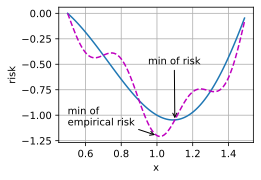

In [12]:
""" The graph below illustrates that the minimum of the empirical risk on a training dataset may be at a different location 
from the minimum of the risk (generalization error). """

def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = tf.range(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

# Local Minima
For any objective function f(x), if the value of x at f(x) is smaller than the values of f(x) at any other points in the vicinity of x, then f(x) could be a local minimum. If the value of f(x) at x is the minimum of the objective function over the entire domain, then f(x) is the global minimum.

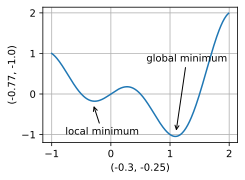

In [13]:
x = tf.range(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], (-0.3, -0.25), (-0.77, -1.0))
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))